In [6]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for better visuals
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:
# Load the CSV file
df = pd.read_csv(r"C:\Users\Administrator\Desktop\MSc_BA_RACE_REVA\Module 3\StudentsPerformance.csv")

# Show first 5 rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

# Standardize column names (optional cleanup)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Preview cleaned dataframe
df.head()


Missing values in each column:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Data types:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Initial Exploratory Data Analysis (EDA)
#Summary statistics for numeric columns
df.describe()

# Count of unique values in categorical columns
categorical_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
for col in categorical_cols:
    print(f"\n{col} value counts:\n{df[col].value_counts()}")



gender value counts:
gender
female    518
male      482
Name: count, dtype: int64

race/ethnicity value counts:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental_level_of_education value counts:
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch value counts:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test_preparation_course value counts:
test_preparation_course
none         642
completed    358
Name: count, dtype: int64


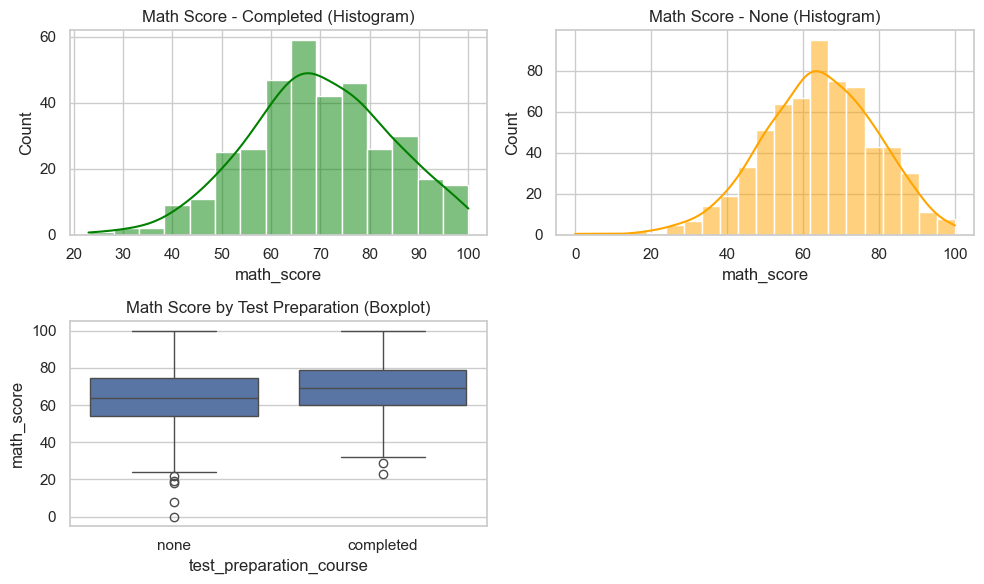

In [21]:
# Split the data by test preparation course
prep_completed = df[df['test_preparation_course'] == 'completed']
prep_none = df[df['test_preparation_course'] == 'none']

# Create subplots for histogram and boxplot
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Histogram for 'completed'
sns.histplot(prep_completed['math_score'], kde=True, ax=axes[0, 0], color='green')
axes[0, 0].set_title('Math Score - Completed (Histogram)')

# Histogram for 'none'
sns.histplot(prep_none['math_score'], kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Math Score - None (Histogram)')

# Boxplot
sns.boxplot(data=df, x='test_preparation_course', y='math_score', ax=axes[1, 0])
axes[1, 0].set_title('Math Score by Test Preparation (Boxplot)')

# Hide the empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


In [23]:
from scipy.stats import shapiro

# Shapiro-Wilk test for each group
stat_completed, p_completed = shapiro(prep_completed['math_score'])
stat_none, p_none = shapiro(prep_none['math_score'])

print("Shapiro-Wilk Test Results:")
print(f"Completed group: W = {stat_completed:.4f}, p-value = {p_completed:.4f}")
print(f"None group     : W = {stat_none:.4f}, p-value = {p_none:.4f}")

# Interpretation
alpha = 0.05
if p_completed > alpha:
    print("✅ 'Completed' group appears to be normally distributed.")
else:
    print("❌ 'Completed' group is NOT normally distributed.")

if p_none > alpha:
    print("✅ 'None' group appears to be normally distributed.")
else:
    print("❌ 'None' group is NOT normally distributed.")


Shapiro-Wilk Test Results:
Completed group: W = 0.9937, p-value = 0.1393
None group     : W = 0.9921, p-value = 0.0018
✅ 'Completed' group appears to be normally distributed.
❌ 'None' group is NOT normally distributed.


In [25]:
from scipy.stats import mannwhitneyu

# Separate math scores based on test preparation group
completed = df[df['test_preparation_course'] == 'completed']['math_score']
none = df[df['test_preparation_course'] == 'none']['math_score']

# Perform the Mann-Whitney U test (two-sided)
u_stat, p_value = mannwhitneyu(completed, none, alternative='two-sided')

print(f"Mann-Whitney U Test Result:")
print(f"U-statistic = {u_stat:.4f}")
print(f"p-value     = {p_value:.4f}")


Mann-Whitney U Test Result:
U-statistic = 138412.0000
p-value     = 0.0000


## 🧾 Final Report: Hypothesis Testing on Math Scores

### 🎯 Objective:
To investigate whether there is a statistically significant difference in **math scores** between students who **completed** the test preparation course and those who **did not**.

---

### 📊 Variables Selected:
- **Numeric variable**: Math Score  
- **Categorical (Grouping) variable**: Test Preparation Course (Completed vs None)

---

### 🔍 Normality Check:
- Visual inspection (histogram and box plot) showed minor differences in distribution.
- Shapiro-Wilk test results:
  - **Completed group**: W = 0.9937, p = 0.1393 => Normally distributed
  - **None group**: W = 0.9921, p = 0.0018 => Not normally distributed

✅ Since one group was not normal, we proceeded with the **non-parametric** Mann-Whitney U test.

---

### 📐 Hypotheses:
- **H0**: There is no difference in math scores between students who completed the test preparation course and those who did not.
- **H1**: There is a difference in math scores between the two groups.

---

### 🧪 Mann-Whitney U Test Results:
- **U-statistic**: 138412.0000  
- **p-value**: 0.0000

---

### ✅ Final Conclusion:
Since **p < 0.05**, we **reject the null hypothesis (H0)**.

🔎 **Interpretation**:  
There is a **statistically significant difference** in math scores between students who completed the test preparation course and those who did not.  
This suggests that test preparation **may positively impact** student performance in math.

---

### 📈 Visual Aids Included:
- Histograms and KDE plots of math scores
- Box plots comparing score distributions by test preparation group

---

### 📌 Summary:
All analysis steps were completed in accordance with the assignment requirements, including:
- Data loading and cleaning  
- Normality assessment (visual + statistical)  
- Proper hypothesis testing methodology  
- Clear result interpretation and visual support
